In [763]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, linear_model
import sklearn.datasets
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gsa

import os
from sklearn import tree, ensemble, metrics, cross_validation, externals
from sklearn.neighbors import KNeighborsClassifier #our classifier 
from sklearn.cross_validation import train_test_split #train-test
from sklearn import preprocessing, cross_validation, neighbors, linear_model, metrics, tree

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [657]:
Location = r'/Users/Carlina/Documents/DataScience/DAT-NYC-37-master/DAT-NYC-37/projects/final-projects/Dataset/breast-cancer-wisconsin.csv'
df = pd.read_csv(Location)
df.head(5)

,ID,Clump_thickness,Uniformity_cellSize,Uniformity_cellshape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


## Exploratory Data Analysis

In [658]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                        699 non-null int64
Clump_thickness           699 non-null int64
Uniformity_cellSize       699 non-null int64
Uniformity_cellshape      699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               683 non-null float64
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB
None


In [659]:
# dropping data with missing values
df_preprocessing = df.dropna()
print df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
ID                        683 non-null int64
Clump_thickness           683 non-null int64
Uniformity_cellSize       683 non-null int64
Uniformity_cellshape      683 non-null int64
marginal_adhesion         683 non-null int64
single_epithelial_size    683 non-null int64
bare_nuclei               683 non-null float64
bland_chromatin           683 non-null int64
normal_nucleoli           683 non-null int64
mitoses                   683 non-null int64
class                     683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB
None


In [660]:
df_preprocessing.corr()

,ID,Clump_thickness,Uniformity_cellSize,Uniformity_cellshape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity_cellSize,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity_cellshape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


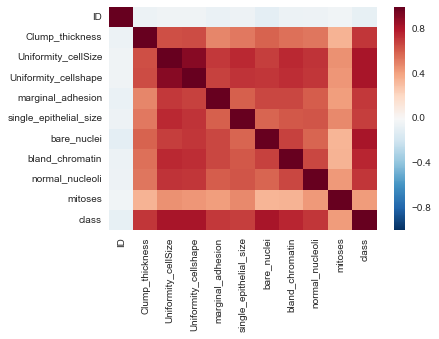

In [661]:
sns.heatmap(df_preprocessing.corr());

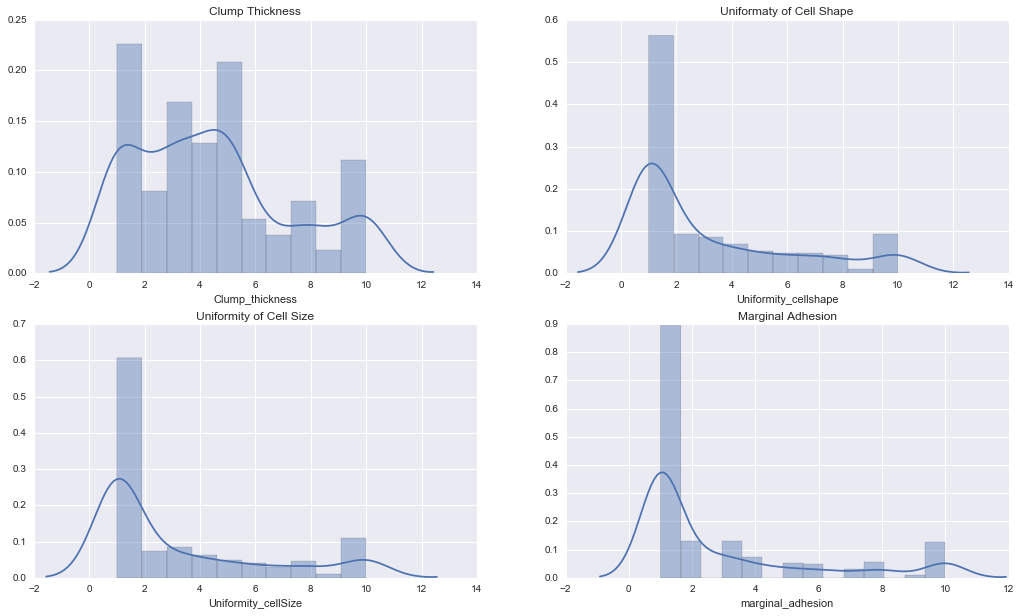

In [662]:
fig = plt.figure(figsize=(27,10)) 

plot_1 = plt.subplot2grid((2,3),(0,0))              
sns.distplot(df_preprocessing['Clump_thickness'])
plt.title("Clump Thickness")  
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)

plot_2 = plt.subplot2grid((2,3),(1,0))
sns.distplot(df_preprocessing['Uniformity_cellSize']);
plt.title("Uniformity of Cell Size")  
locs, labels = plt.xticks()

plot_3 = plt.subplot2grid((2,3),(0,1))
sns.distplot(df_preprocessing['Uniformity_cellshape']);
plt.title("Uniformaty of Cell Shape")  
locs, labels = plt.xticks()

plot_4 = plt.subplot2grid((2,3),(1,1))
sns.distplot(df_preprocessing['marginal_adhesion']);
plt.title("Marginal Adhesion")  
locs, labels = plt.xticks()

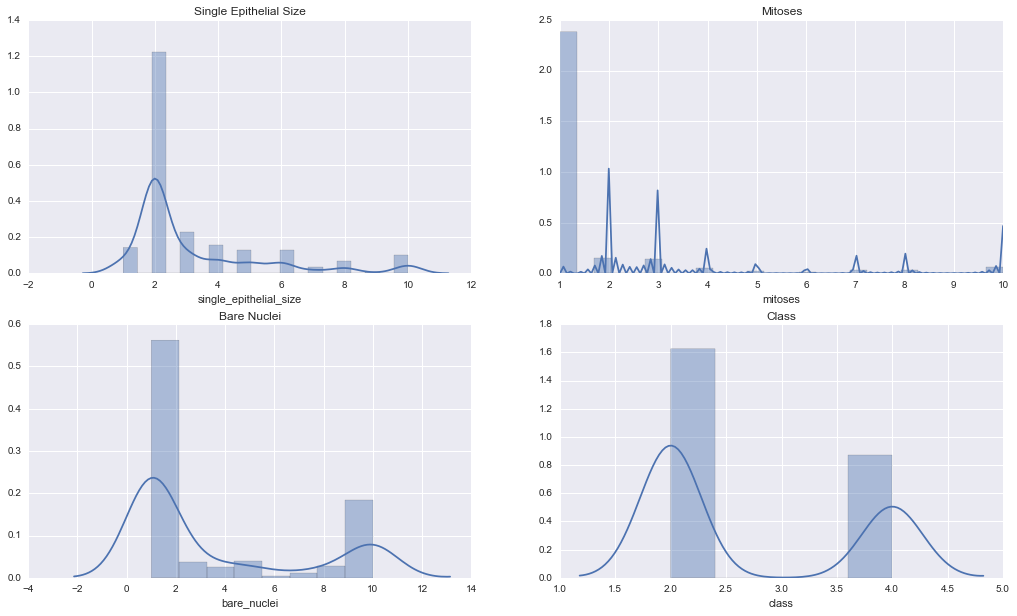

In [663]:
fig = plt.figure(figsize=(27,10)) 

plot_1 = plt.subplot2grid((2,3),(0,0))              
sns.distplot(df_preprocessing['single_epithelial_size'])
plt.title("Single Epithelial Size")  
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)

plot_2 = plt.subplot2grid((2,3),(1,0))
sns.distplot(df_preprocessing['bare_nuclei']);
plt.title("Bare Nuclei")  
locs, labels = plt.xticks()

plot_3 = plt.subplot2grid((2,3),(0,1))
sns.distplot(df_preprocessing['mitoses']);
plt.title("Mitoses")  
locs, labels = plt.xticks()

plot_4 = plt.subplot2grid((2,3),(1,1))
sns.distplot(df_preprocessing['class']);
plt.title("Class")  
locs, labels = plt.xticks()

In [664]:
# Dropping the columns I don't need for training, decided to drop uniformity cell size as well as it highly correlates, i.e is nearly the same as cell shape
# Defining X and y 
X = df_preprocessing.drop(['ID', 'Uniformity_cellSize', 'class'], axis=1)
y = df_preprocessing['class']  


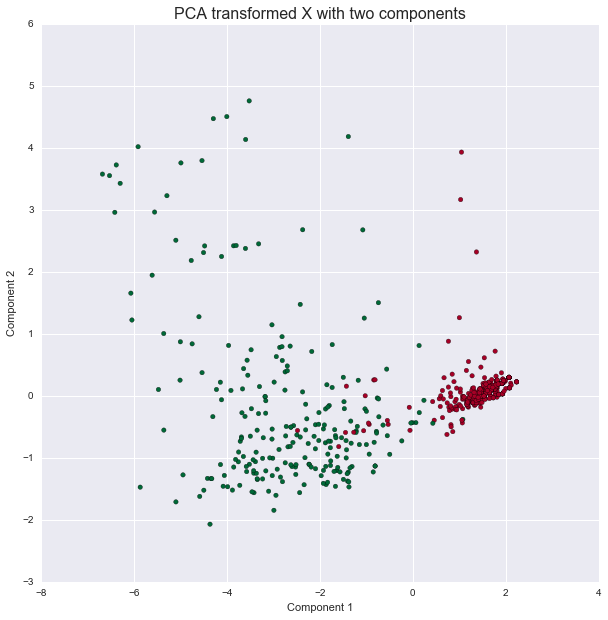

In [699]:
scaled_pca_pipeline = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2))])

X_scaled_pca = scaled_pca_pipeline.fit_transform(X)

fig = plt.figure(figsize=(10, 10))

plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=y, cmap="RdYlGn")

axes = fig.gca()
axes.set_title("PCA transformed X with two components", size=16)
axes.set_xlabel("Component 1")
axes.set_ylabel("Component 2");

In [707]:
y = (df_preprocessing['class'] == 4)
#training and testing samples
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=1)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = cross_validation.train_test_split(X_scaled_pca, y, test_size=0.30, random_state=1)

In [708]:
# This is just a utility method to help print a summary of the results
def format_model_results(sklearn_model, X_train, X_test, y_train, y_test):
    # Get the model's class name (E.g. LogisticRegression, KNearestNeighbor, etc.) and store it to a string
    model_class_name = sklearn_model.__class__.__name__  
    
    y_test_pred   = sklearn_model.predict(X_test)
    y_train_pred  = sklearn_model.predict(X_train)

    precision_score = metrics.precision_score(y_test_pred, y_test)
    recall_score    = metrics.recall_score(y_test_pred, y_test)
    f1_score        = metrics.f1_score(y_test_pred, y_test)
    f1_score_train  = metrics.f1_score(y_train_pred, y_train)
    auc_score       = metrics.roc_auc_score(y_test_pred, y_test)
    
    return pd.DataFrame({
            "Precision": precision_score, 
            "Recall": recall_score, 
            "F1 score": f1_score, 
            "F1 score (train)": f1_score_train, 
            "AUC": auc_score
        }, index=[model_class_name])

## KNN

In [725]:
KNeighborsClassifier()
#knn
knn_model = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
print "Train score before PCA:", knn_model.score(X_test, y_test)
knn_model_pca = KNeighborsClassifier(n_neighbors = 6).fit(X_pca_train, y_pca_train)
print "Train score after PCA:", knn_model_pca.score(X_pca_train, y_pca_train)

Train score before PCA: 0.960975609756
Train score after PCA: 0.97280334728


In [713]:
format_model_results(knn_model, X_train, X_test, y_train, y_test)

,AUC,F1 score,F1 score (train),Precision,Recall
KNeighborsClassifier,0.957185,0.944444,0.97006,0.944444,0.944444


In [714]:
format_model_results(knn_model_pca, X_pca_train, X_pca_test, y_pca_train, y_pca_test)

,AUC,F1 score,F1 score (train),Precision,Recall
KNeighborsClassifier,0.950602,0.937931,0.960961,0.944444,0.931507


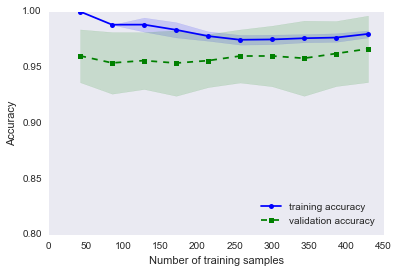

In [669]:
#learning curve plot, to see if the model has too high variange or high bias, and if collecting more data would help improve the model
train_sizes, train_scores, test_scores = learning_curve(estimator=knn_model, X=X_train, y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

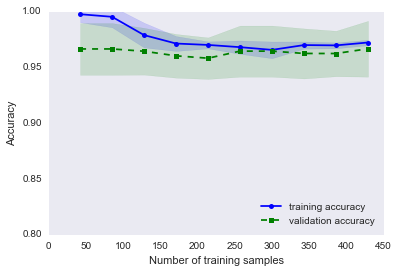

In [715]:
train_sizes, train_scores, test_scores = learning_curve(estimator=knn_model_pca, X=X_pca_train, y=y_pca_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [722]:
#predicting if benign or malignant example
example_measures = np.array([4,2,1,2,3,2,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = knn_model.predict(example_measures)
print(prediction)

[False]


In [720]:
#predicting if benign or malignant example 2
example_measures = np.array([8,4,3,6,6,6,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = knn_model.predict(example_measures)
print(prediction)

[ True]


k: 2 => 0.94
k: 3 => 0.96
k: 4 => 0.97
k: 5 => 0.96
k: 6 => 0.96
k: 7 => 0.97
k: 8 => 0.96
k: 9 => 0.96
k: 10 => 0.96
k: 11 => 0.96
k: 12 => 0.96
k: 13 => 0.96
k: 14 => 0.96
k: 15 => 0.96
k: 16 => 0.95
k: 17 => 0.95
k: 18 => 0.95
k: 19 => 0.95
k: 20 => 0.95
k: 21 => 0.95
k: 22 => 0.95
k: 23 => 0.95
k: 24 => 0.95
k: 25 => 0.95
k: 26 => 0.95
k: 27 => 0.95
k: 28 => 0.95
k: 29 => 0.95
k: 30 => 0.95
k: 31 => 0.95
k: 32 => 0.95
k: 33 => 0.95
k: 34 => 0.95
k: 35 => 0.95
k: 36 => 0.95
k: 37 => 0.95
k: 38 => 0.95
k: 39 => 0.95
k: 40 => 0.95
k: 41 => 0.95
k: 42 => 0.95
k: 43 => 0.95
k: 44 => 0.95
k: 45 => 0.95
k: 46 => 0.95
k: 47 => 0.95
k: 48 => 0.95
k: 49 => 0.95
k: 50 => 0.95
k: 51 => 0.95
k: 52 => 0.95
k: 53 => 0.95
k: 54 => 0.95
k: 55 => 0.95
k: 56 => 0.95
k: 57 => 0.95
k: 58 => 0.95
k: 59 => 0.95
k: 60 => 0.95
k: 61 => 0.95
k: 62 => 0.95
k: 63 => 0.95
k: 64 => 0.95
k: 65 => 0.95
k: 66 => 0.95
k: 67 => 0.95
k: 68 => 0.95
k: 69 => 0.95
k: 70 => 0.95
k: 71 => 0.95
k: 72 => 0.95
k: 73 => 0.95


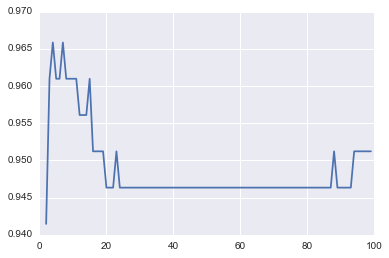

In [723]:
def knn_pca1(k):
    knn_pca1 = KNeighborsClassifier(k) 
    knn_pca1.fit(X_train, y_train)
    return knn_pca1.score(X_test, y_test)

for k in range(2, 100):
    print "k: %s => %0.2f" % (k, knn_pca1(k))

scores = [knn_pca1(k) for k in range(2, 100)]    
plt.plot(range(2,100), scores)

In [724]:
model = KNeighborsClassifier(n_neighbors=50, weights='distance')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print type(scores)

print "Mean Score", scores.mean()

<type 'numpy.ndarray'>
Mean Score 0.954701270614


## Logistic Regression

In [676]:
names_X = ['Clump_thickness', 'Uniformity_cellshape',
    'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
    'bland_chromatin', 'normal_nucleoli', 'mitoses']

In [738]:
logit_model = LogisticRegression().fit(X_train, y_train)
print "Train score before PCA:", logit_model.score(X_test, y_test)
logit_model_pca = LogisticRegression().fit(X_pca_train, y_pca_train)
print "Train score after PCA:", logit_model_pca.score(X_pca_train, y_pca_train)

Train score before PCA: 0.965853658537
Train score after PCA: 0.966527196653


In [740]:
format_model_results(logit_model, X_train, X_test, y_train, y_test)

,AUC,F1 score,F1 score (train),Precision,Recall
LogisticRegression,0.961239,0.951724,0.967164,0.958333,0.945205


In [742]:
format_model_results(logit_model_pca, X_pca_train, X_pca_test, y_pca_train, y_pca_test)

,AUC,F1 score,F1 score (train),Precision,Recall
LogisticRegression,0.965339,0.958904,0.952381,0.972222,0.945946


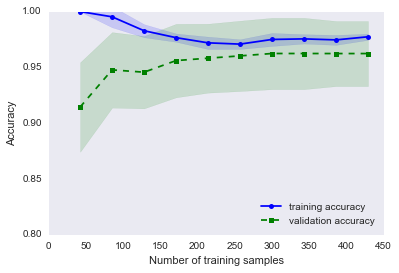

In [731]:
#learning curve plot, to see if the model has too high variange or high bias, and if collecting more data would help improve the model
# it shows the model is slightly overfitting, (gap at the beginning between training and validation accuracy)
train_sizes, train_scores, test_scores = learning_curve(estimator=logit_model, X=X_train, y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

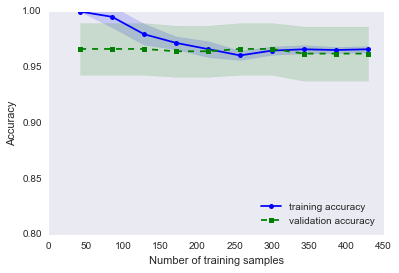

In [760]:
train_sizes, train_scores, test_scores = learning_curve(estimator=logit_model_pca, X=X_pca_train, y=y_pca_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [735]:
#predicting if benign or malignant example
example_measures = np.array([4,2,1,2,3,2,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = logit_model.predict(example_measures)
print(prediction)

[False]


In [736]:
example_measures = np.array([8,4,3,6,6,6,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = logit_model.predict(example_measures)
print(prediction)

[ True]


## Decision Tree

In [747]:
tree_model = tree.DecisionTreeRegressor().fit(X_train, y_train)
print "Train score before PCA:", tree_model.score(X_test, y_test)
tree_model_pca = tree.DecisionTreeRegressor().fit(X_pca_train, y_pca_train)
print "Train score after PCA:", tree_model_pca.score(X_pca_train, y_pca_train)

Train score before PCA: 0.807330827068
Train score after PCA: 1.0


In [749]:
format_model_results(tree_model, X_train, X_test, y_train, y_test)

,AUC,F1 score,F1 score (train),Precision,Recall
DecisionTreeRegressor,0.963736,0.934307,1.0,0.888889,0.984615


In [751]:
format_model_results(tree_model_pca, X_pca_train, X_pca_test, y_pca_train, y_pca_test)

,AUC,F1 score,F1 score (train),Precision,Recall
DecisionTreeRegressor,0.958974,0.952381,1.0,0.972222,0.933333


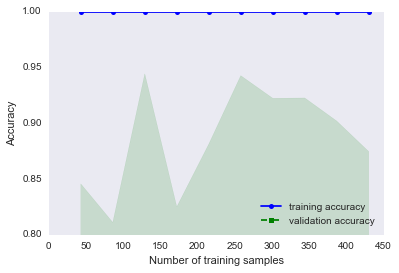

In [687]:
train_sizes, train_scores, test_scores = learning_curve(estimator=tree_model, X=X_train, y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [688]:
#pca Decision Tree
#tree_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)), ('tree_model', tree.DecisionTreeRegressor())])
#tree_pca.fit(X_train, y_train)
#print('Test Accuracy: %.3f' % tree_pca.score(X_test, y_test))

Test Accuracy: 0.893


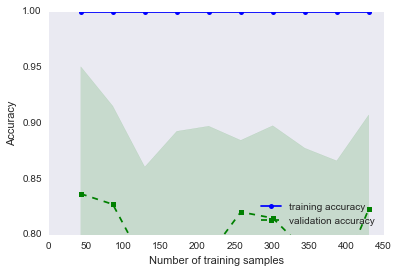

In [761]:
train_sizes, train_scores, test_scores = learning_curve(estimator=tree_model_pca, X=X_pca_train, y=y_pca_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [777]:
example_measures = np.array([4,2,1,2,3,2,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = tree_model.predict(example_measures)
print(prediction)

[ 0.]


In [776]:
example_measures = np.array([8,4,3,6,6,6,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = tree_model.predict(example_measures)
print(prediction)

[ 0.]


## Random Forest

In [767]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_features=None, oob_score=True, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
print "Train score before PCA:", rf_model.score(X_test, y_test)

rf_model_pca = RandomForestClassifier(n_estimators = 1000, max_features=None, oob_score=True, min_samples_leaf=5)
rf_model_pca.fit(X_pca_train, y_pca_train)
print "Train score after PCA:", rf_model_pca.score(X_pca_train, y_pca_train)

 Train score before PCA: 0.970731707317
Train score after PCA: 0.97489539749


In [768]:
format_model_results(rf_model, X_train, X_test, y_train, y_test)

,AUC,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.965339,0.958904,0.970414,0.972222,0.945946


In [771]:
format_model_results(rf_model_pca, X_pca_train, X_pca_test, y_pca_train, y_pca_test)

,AUC,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.967532,0.966443,0.964912,1.0,0.935065


In [773]:
example_measures = np.array([4,2,1,2,3,2,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = rf_model.predict(example_measures)
print(prediction)

[False]


In [775]:
example_measures = np.array([8,4,3,6,6,6,1,3])

example_measures = example_measures.reshape(1, -1)
prediction = rf_model.predict(example_measures)
print(prediction)

[ True]
